# How to prevent Overfitting and Underfitting

In [1]:
# Import relevent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load food classifcation dataset
df=pd.read_csv(r'datasets/16.fruit_dataset.csv')

In [3]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [4]:
# Check value counts of classes
df.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

In [5]:
print(f"Column names: {df.columns}")

Column names: Index(['fruit_label', 'fruit_name', 'mass', 'width', 'height', 'color_score'], dtype='object')


In [6]:
df.fruit_label.value_counts()

1    19
3    19
4    16
2     5
5     2
Name: fruit_label, dtype: int64

In [7]:
# Create feature table
x=df.drop(['fruit_label','fruit_name'],axis=1,inplace=False)
print(f"Column Names: {x.columns}")

Column Names: Index(['mass', 'width', 'height', 'color_score'], dtype='object')


In [8]:
# Create target table
y=df['fruit_label']

In [9]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

# Preventing Overfitting

### 1. Using CrossValidation

Cross Validation is powerful preventive measure against overfitting, with a clever idea, Create multiple train validation splits within the original train data, and use these to tune your model.
We have a standard way of doing so, is called "K Fold cross validation". What we do here is, partition the data in k subsets which we call "folds".
Then iterativly train our model on k-1 folds and validate on kth fold. The last fold is called 'holdout fold'.
Using crossvalidation, you can tune your hyperparameters only with your original train dataset. This way you can keep the validation set as completly unseen dataset.
K fold validation may not completely remove the overfitting, so we can change the folds every now and then, or use multiple k fold cross validations together.

### 2. Train with more data
The signal will be better detected by the algorithm if we train the model with more data. Although it doesn’t work every time, for example if we just add more noisy data, then this technique won’t help.

### 3.Remove features
In algorithms that don’t have a built-in feature selection, their generalization can be manually improved by removing some irrelevant or unimportant features. Why is removing features helpful? Sometimes it may happen that the model may fail to generalize simply because the model missed the patterns that should have been detected, and the data was too complex for the same.

### 4.Add Regularization
As we discussed earlier,that overfitting could be consequence of the model being too complex,Can we forcefully make it simpler?Yes!
Refularization is the term for a range of techniques that could be used to force your model in being simpler.The technique used to regularize any model will depend on the model itself.For example,an option could be pruning a decision tree,on neural network you could use a dropout, or, to the cost of fuction in regression, a penalty parameter could be added.

# Identify Overfitting in Our Dataset

In [10]:
# Split our data into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
# Use logistic regression to build a model
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=5000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [12]:
# Check the score of model on train and test set
from sklearn import metrics

print('Training Score : ',lr.score(x_train,y_train))
print('Test Score : ',lr.score(x_test,y_test))

Training Score :  0.8125
Test Score :  0.46153846153846156


In [13]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

### Solving Overfitting in Our Dataset: `Train with more data`

### Upsample mandarin

In [14]:
# separate minority and majority classes
from sklearn.utils import resample

mandarin=df[df.fruit_label==2]
apple=df[df.fruit_label==1]
mango=df[df.fruit_label==5]
lemon=df[df.fruit_label==4]

#upsample minotity
mandarin_data_upsampled=resample(mandarin,replace=True,# sample with replacement
                                n_samples=len(apple)-len(mandarin), # match the majority class
                                 random_state=67

                                )

mango_data_upsampled=resample(mango,replace=True,# sample with replacement
                                n_samples=len(apple)-len(mango), # match the majority class
                                 random_state=67

                                )

lemon_data_upsampled=resample(lemon,replace=True,# sample with replacement
                                n_samples=len(apple)-len(lemon), # match the majority class
                                 random_state=67

                                )

In [15]:
Frame=[df,mango_data_upsampled,mandarin_data_upsampled,lemon_data_upsampled]
df=pd.concat(Frame,axis=0)

In [16]:
df['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
lemon       19
mango       19
Name: fruit_name, dtype: int64

In [17]:
df.reset_index(drop=True)

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
...,...,...,...,...,...,...
90,2,mandarin,80,5.8,4.3,0.77
91,2,mandarin,80,5.8,4.3,0.77
92,4,lemon,216,7.3,10.2,0.71
93,4,lemon,174,7.3,10.1,0.72


In [18]:
x=df.iloc[:,2:]
y=df.iloc[:,:1]

In [19]:
# fit the upsampled data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=53)
lr.fit(x_train,y_train.to_numpy().ravel())

LogisticRegression(max_iter=5000)

In [20]:
from sklearn import metrics

print('Training Score : ',lr.score(x_train,y_train))
print('Test Score : ',lr.score(x_test,y_test))

Training Score :  0.881578947368421
Test Score :  0.7368421052631579


In [21]:
predict=lr.predict(x_test)

In [22]:
df_predict=pd.DataFrame(predict,columns=['predicted_y'])

df_predict.head()

,predicted_y
0,1
1,1
2,1
3,4
4,5


In [23]:
y_test.head()

,fruit_label
36,3
32,3
28,3
53,4
60,5


In [24]:
y_test=y_test.reset_index(drop=True)

In [25]:
y_test

,fruit_label
0,3
1,3
2,3
3,4
4,5
5,3
6,2
7,2
8,5
9,1


In [26]:
check=pd.concat([y_test,df_predict],axis=1)
check

,fruit_label,predicted_y
0,3,1
1,3,1
2,3,1
3,4,4
4,5,5
5,3,1
6,2,2
7,2,2
8,5,5
9,1,1


In [27]:
check[check['fruit_label']==check['predicted_y']].count()

fruit_label    14
predicted_y    14
dtype: int64

In [28]:
lr.score(x_test,y_test)

0.7368421052631579

`Our Test score has already improved by upsampling classes`

# Preventing Underfitting:
***

**1.Increasing the complexity of the model:** <br>

A probable cause of underfitting could be the fact that the model is not complex enough to understand the underlaying patterns in the data.

Making the switch to say,a non-linear model from linear model,or,say by adding the more hidden layers to your existing neural network could be ways to make the model more complex,and in turn could help in removal of underfitting.

**2.Reducing Regularization:** <br>

Well underfitting is somewhat close to overfitting.So,as we read earlier,regularization could help solve the overfitting problem,then reducing it could help solve underfitting problems! Some of algorithms you use by default include some regularization parameters meant to surpass overfitting.Sometimes,these could also cause hindrance in learning of algorithms. Decreasing their values for most part,makes a difference.

You must be thinking,that if underfitting is almost the opposite of overfitting, then maybe adding more features or data would help solve the problem? No! If these dataset lacks features that are decisive,and important that could help you model in detecting pattern, you can multiply the train set by 2 or 5,even 10, but it will not help in making your algorithm better. It is common notation to think that growing more data would solve the problem, but as stated earlier, it must jeopardize the project.

`Weather Dataset:` Use pressure to predict Humidity

In [29]:
# Import relevent libraries
import pandas as pd
import numpy as np

In [30]:
weather_data_p=pd.read_csv(r'datasets/17.WeatherDataP.csv')
weather_data_p.head()

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


In [31]:
x = weather_data_p['Pressure (millibars)'].to_frame()
y= weather_data_p['Humidity']

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=53)

In [33]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [34]:
from sklearn import metrics

print('training score : ',lr.score(x_train,y_train))
print('test score : ',lr.score(x_test,y_test))

training score :  0.2460883536333518
test score :  0.5376126046017614


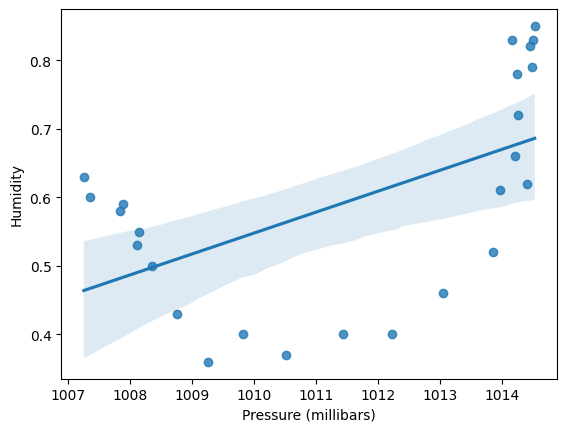

In [35]:
# Plot linear regression line with true values to compare
import seaborn as sns

sns.regplot(data=weather_data_p,x=weather_data_p['Pressure (millibars)'],y=weather_data_p['Humidity'])
plt.show()

**Increase Complexity**<br>
previous equation :<br>
$\hat{y}=\theta_{0}1 + \theta_{1}x$ <br><br>
modified equation : <br>
$\hat{y}=\theta_{0}1 + \theta_{1}x + \theta_{2}x^{2}$

In [36]:
from sklearn.preprocessing import PolynomialFeatures

pre_process=PolynomialFeatures(degree=2)

x_poly=pre_process.fit_transform(x)

df_x_poly=pd.DataFrame(x_poly,columns=[1,'x','x_squared'])
# df_x_poly.head()
df_y=pd.DataFrame(y)
df=df_x_poly.join(df_y,how='outer')

In [37]:
x_poly_train,x_poly_test,y_train,y_test=train_test_split(df_x_poly,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_poly_train.to_numpy(),y_train)

LinearRegression()

In [39]:
y_pred=lr.predict(x_poly)

In [40]:
from sklearn import metrics

print('Training score : ',lr.score(x_poly_train.to_numpy(),y_train))
print('Test score : ',lr.score(x_poly_test.to_numpy(),y_test))

Training score :  0.893789881189093
Test score :  0.5689740100251556


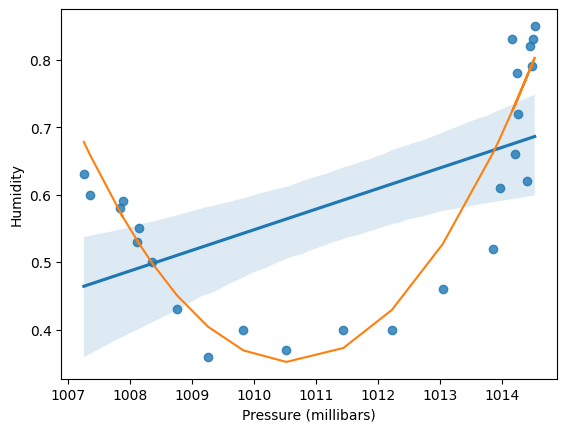

In [41]:
# Plot polinominal regression line as well as linear regression to compare with true values
import seaborn as sns

sns.regplot(data=weather_data_p,x=weather_data_p['Pressure (millibars)'],y=weather_data_p['Humidity'])
plt.plot(x,y_pred)
plt.show()

### Our objective is to keep highest validation score while keeping train and test score as close as possible